**Multiple Linear Regression: -** 

Multiple linear regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read data from CSV file using pd.read_csv model 

In [2]:
df = pd.read_csv(r"E:\Machine Leaning\Computer_Data.csv")
df.head(3)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1


#### Removed unwanted column

In [3]:
df.drop("Unnamed: 0",axis = 1, inplace = True)

#### checking shape of dataset

In [4]:
df.shape

(6259, 10)

Information about columns like Dtype NUll value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [6]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


I used `LabelEncoder` to convert categorical variables ('cd', 'multi', and 'premium') into the numerical format, making them suitable for machine learning algorithms. The transformed DataFrame's first few rows are then displayed using `df.head()`

In [7]:
le = LabelEncoder()
df['cd'] = le.fit_transform(df['cd'])
df['multi'] = le.fit_transform(df['multi'])
df['premium'] = le.fit_transform(df['premium'])
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


#### I checked outlier in the **price** column to make a good accurate model and prediction

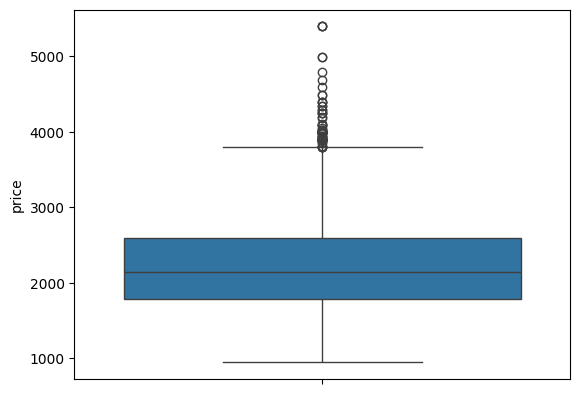

In [8]:
sns.boxplot(df['price'])
plt.show()

#### After checking Outlier I got a lot of outliers which is the disadvantage of a good model and predict so we have to remove Outliers 

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
UpperBound = Q3 + 1.5 * IQR
LowerBound = Q1 - 1.5 * IQR
df = df[(df['price'] > LowerBound) & (df['price'] < UpperBound)]
df.shape

(6184, 10)

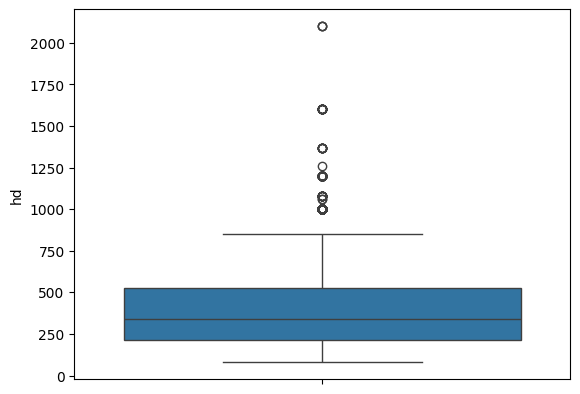

In [10]:
sns.boxplot(df['hd'])
plt.show()

In [11]:
Q1 = df['hd'].quantile(0.25)
Q3 = df['hd'].quantile(0.75)
IQR = Q3 - Q1
UpperBound = Q3 + 1.5 * IQR
LowerBound = Q1 - 1.5 * IQR
df = df[(df['hd'] > LowerBound) & (df['hd'] < UpperBound)]
df.shape

(5711, 10)

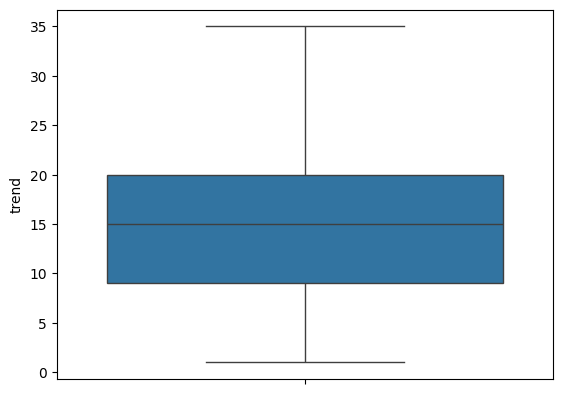

In [12]:
sns.boxplot(df['trend'])
plt.show()

#### Separated Input factors from the dataset to fit the model and prediction

In [13]:
inputData = df.iloc[:,1:]
inputData.head(3)

,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,25,80,4,14,0,0,1,94,1
1,33,85,2,14,0,0,1,94,1
2,25,170,4,15,0,0,1,94,1


#### Separated Output factors from the dataset to fit the model and prediction

In [14]:
predict = df.iloc[:,:1]
predict.head(3)

,price
0,1499
1,1795
2,1595


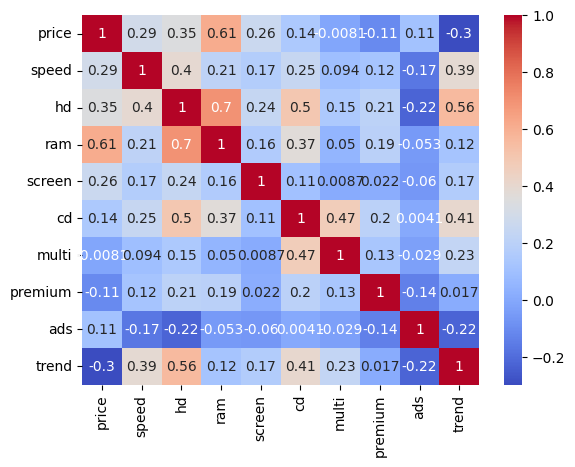

In [15]:
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')
plt.show()

The `train_test_split` function splits arrays or matrices into random train and test subsets, with 80% of the data assigned to training and 20% to testing, ensuring reproducibility with `random_state=42`.

In [16]:
inputData_train, inputData_test, predict_train, predict_test = train_test_split(inputData,predict, test_size= 0.2,random_state=42 )

In [17]:
#inputData_test, inputData_train, preditct_test, predict_train = train_test_split(inputData,predict, test_size= 0.2,random_state=42 )

#### Now, here I have to make the `lr` object in the **LinearRegression()** class at object `lr` fitting the model

In [18]:
lr = LinearRegression()
lr.fit(inputData_train, predict_train)

LinearRegression()

#### Using `lr.score` we can check how the much percentage of accuracy of mode, however, my model accuracy is `76.558832375245`

In [19]:
lr.score(inputData_test, predict_test)*100

76.5588323752453

In [24]:
lr.predict([[33,	85,	2,	14,	0,	0,	1,94,1]])

C:\Users\SANJAN PANDIT\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1940.1835515]])

#### Coefficient or slop of the linear equation

In [25]:
lr.coef_

array([[   8.78660616,    0.86572617,   53.36041624,  106.84766187,
          33.6422487 ,  114.24242637, -497.14176432,    0.54923351,
         -47.92233449]])

#### Intercept point or we can say the constant value of the linear equation

In [26]:
lr.intercept_

array([467.48687402])